In [45]:
import scipy.linalg
import scipy.sparse.linalg
import numpy as np
import time

import sys as ss
import scipy
import numpy as np

from scipy.sparse.linalg import spsolve

## Задача 1


Реализовать с помощью scipy генератор полосатых матриц, который должен поддерживать функции:
* Генерация абсолютно случайной полосатой матрицы $n\times m$
* Генерация полосатой матрицы с постоянными коэффициентами вдоль каждой полосы $n\times 1$
* Генерация случайного возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$
* Генерация полосатой матрицы, в которой полосы заданы векторами.

 Сравнить три приведённых ниже метода создания матриц между собой по использованию памяти, используя измерение размера объектов в Python (sys.getsizeof(object[, default])). 
 Реализовать генератор матриц всеми тремя методами, сравнить их также по скорости (для решения систем уравнений).




#### Сравним сначала три метода генерации матриц и решения уравнений (для систем 3000х3000):

In [56]:
N = 3000
m = 3
f = np.random.normal(0, 10, N)

### 1 метод

In [57]:
t0 = time.time()

Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()

memory = ss.getsizeof(Ap)*5 + ss.getsizeof(diagonals) + ss.getsizeof(A)
t1 = time.time()

x = scipy.linalg.solve(A, f)
# print(A, x, sep = '\n')

t2 = time.time()

print("Генерация: %s ms" % ((t1 - t0) * 1000))
print("Решение: %s ms" % ((t2 - t1) * 1000))
print("Использовано памяти: %s b"%(memory))

Генерация: 8.002519607543945 ms
Решение: 1009.5672607421875 ms
Использовано памяти: 72120736 b


### 2 метод

In [58]:
t0 = time.time()

Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
A = np.zeros((2 * m + 1, N))
A[0] = Ae
A[m - 1] = An
A[m] = Ap
A[m + 1] = As
A[2 * m] = Aw

memory = ss.getsizeof(Ap)*5 + ss.getsizeof(diagonals) + ss.getsizeof(A)
t1 = time.time() 

x = scipy.linalg.solve_banded((m, m), A, f)
# print(A, x, sep = '\n')

t2 = time.time()

print("Генерация: %s ms" % ((t1 - t0) * 1000))
print("Решение: %s ms" % ((t2 - t1) * 1000))
print("Использовано памяти: %s b"%(memory))

Генерация: 11.004447937011719 ms
Решение: 1.0013580322265625 ms
Использовано памяти: 288736 b


### 3 метод

In [59]:
t0 = time.time()

Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
memory = ss.getsizeof(Ap)*5 + ss.getsizeof(diagonals) + ss.getsizeof(A)

t1 = time.time()

x = spsolve(A, f)
# print(A, x, sep = '\n')

t2 = time.time()

print("Генерация: %s ms" % ((t1 - t0) * 1000))
print("Решение: %s ms" % ((t2 - t1) * 1000))
print("Использовано памяти: %s b"%(memory))

Генерация: 1.001119613647461 ms
Решение: 7.007837295532227 ms
Использовано памяти: 120664 b


#### Очевидно преимущество последнего метода, поэтому его и реализуем.

In [51]:
def random_band_mat(N):
    d1 = np.random.uniform(-1, 1, size=N - 1)
    d2 = np.random.uniform(-1, 1, size=N)
    d3 = np.random.uniform(-1, 1, size=N - 1)
    diagonals = [d1, d2, d3]
    return scipy.sparse.diags(diagonals, [-1,0, 1])
    
def const_band_mat(N, a, b, c):
    d1 = A * np.ones(N-1)
    d2 = B * np.ones(N)
    d3 = C * np.ones(N-1)
    diagonals = [d1, d2, d3]
    return scipy.sparse.diags(diagonals, [-1,0, 1])

def epsilon_band_mat(N, eps):
    d1 = np.random.uniform(-eps, eps, size=N - 1)
    d2 = np.random.uniform(-eps, eps, size=N)
    d3 = np.random.uniform(-eps, eps, size=N - 1)
    diagonals = [d1, d2, d3]
    return scipy.sparse.diags(diagonals, [-1,0, 1])

def vector_band_mat(N, d1, d2, d3):
    diagonals = [d1, d2, d3]
    return scipy.sparse.diags(diagonals, [-1,0, 1])

## Задача 2


В третьем методе из предыдущей задачи для повышения производительности можно использовать sparse.linalg.splu(A).solve(b) , который использует LU-декомпозицию, после чего объект SuperLU  имеет свой собственный метод solve.

Реализуйте генератор матриц из первого задания, используя этот метод. 
https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg   

Убедитесь измерением времени работы, что он работает быстрее. Однако третий метод из предыдущей задачи считается самым предпочтительным. Найдите, в чём недостаток предложенного в этой задаче метода, и докажите его с помощью измерений.

Для измерений можно использовать 

https://docs.python.org/3/library/resource.html#resource-usage  

In [60]:
t0 = time.time()

Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.csc_matrix(scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]))

memory = ss.getsizeof(Ap)*5 + ss.getsizeof(diagonals) + ss.getsizeof(A)
t1 = time.time()

x = scipy.sparse.linalg.splu(A).solve(f)
# print(A, x, sep = '\n')

t2 = time.time()

print("Генерация: %s ms" % ((t1 - t0) * 1000))
print("Решение: %s ms" % ((t2 - t1) * 1000))
print("Использовано памяти: %s b"%(memory))

Генерация: 2.002716064453125 ms
Решение: 5.999088287353516 ms
Использовано памяти: 120664 b


## Задача 3

После первой стадии метода вращений Гивенса система имеет вид 


$a_{11}^{(n-1)} x_{1}+a_{12}^{(n-1)} x_{2}+a_{13}^{(n-1)} x_{3}+\ldots+a_{1 n}^{(n-1)} x_{n}=b_{1}^{(n-1)}$,

$a_{22}^{(1)} x_{2}+a_{23}^{(1)} x_{3}+\ldots+a_{2 n}^{(1)} x_{n}=b_{2}^{(1)}$,

\.......................................................................
  
$a_{n 2}^{(1)} x_{2}+a_{n 3}^{(1)} x_{3}+\ldots+a_{n n}^{(1)} x_{n}=b_{n}^{(1)}$


Доказать следующие формулы:

$$
\begin{aligned}
a_{1 j}^{(l-1)}=& c_{1 l} a_{1 j}^{(l-2)}+s_{1 l} a_{l j}, \ \ a_{l j}^{(1)} =-s_{1 l} a_{1 j}^{(l-2)}+c_{1 l} a_{l j}, \quad a_{1 j}^{(0)}=a_{1 j},
 \\
b_{1}^{(l-1)}=& c_{1 l} b_{1}^{(l-2)}+s_{1 l} b_{l}, \ \ b_{l}^{(1)} =-s_{1 l} b_{1}^{(l-2)}+c_{1 l} b_{l}, 
\\
c_{1 l} &=\frac{a_{11}^{(l-2)}}{\sqrt{\left(a_{11}^{(l-2)}\right)^{2}+a_{l 1}^{2}}}, \quad s_{1 l} =\frac{a_{l 1}}{\sqrt{\left(a_{11}^{(l-2)}\right)^{2}+a_{l 1}^{2}}} & \\
 & l=2,3, \ldots, n .
\end{aligned}
$$

После второй стадии метода вращения Гивенса система уравнений имеет вид: 

$$
\begin{aligned}
a_{11}^{(n-1)} x_{1}+a_{12}^{(n-1)} x_{2}+& a_{13}^{(n-1)} x_{3}+\ldots+a_{1 n}^{(n-1)} x_{n}=b_{1}^{(n-1)} \\
a_{22}^{(n-1)} x_{2}+& a_{23}^{(n-1)} x_{3}+\ldots+a_{2 n}^{(n-1)} x_{n}=b_{2}^{(n-1)} \\
& a_{33}^{(2)} x_{3}+\ldots+a_{3 n}^{(2)} x_{n}=b_{3}^{(2)} \\
& \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \\
& a_{n 3}^{(2)} x_{3}+\ldots+a_{n n}^{(2)} x_{n}=b_{n}^{(2)}
\end{aligned}
$$
Доказать следующие формулы
$$
\begin{aligned}
a_{2 j}^{(l-1)}=& c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \ \ \ a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)} \\
&  j=2,3, \ldots, n \\
b_{2}^{(l-1)}=& c_{2 l} b_{2}^{(l-2)}+s_{2 l} b_{l}^{(1)},\ \ \ b_{l}^{(2)}=-s_{2 l} b_{2}^{(l-2)}+c_{2 l} b_{l}^{(1)} \\
&  
l=3,4, \ldots, n \\
c_{2 l}=& \frac{a_{22}^{(l-2)}}{\left(a_{22}^{(l-2)}\right)^{2}+\left(a_{l 2}^{(1)}\right)^{2}}, \ \ \ s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^{2}+\left(a_{l 2}^{(1)}\right)^{2}}}
\end{aligned}
$$

Доказать следующие формулы 

$a_{2 j}^{(l-1)}=c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \quad a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)}$,
$j=2,3, \ldots, n$
$b_{2}^{(l-1)}=c_{2 l} b_{2}^{(l-2)}+s_{2 l} b_{l}^{(1)}, \quad b_{l}^{(2)}=-s_{2 l} b_{2}^{(l-2)}+c_{2 l} b_{l}^{(1)}$,
$l=3,4, \ldots, n$
$c_{2 l}=\frac{a_{22}^{(l-2)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^{2}+\left(a_{l 2}^{(1)}\right)^{2}}}, \quad s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^{2}+\left(a_{l 2}^{(1)}\right)^{2}}}$

После (n-1) шагов метода Гивенса получаем систему;

$$
\begin{array}{r}
a_{11}^{(n-1)} x_{1}+a_{12}^{(n-1)} x_{2}+a_{13}^{(n-1)} x_{3}+\ldots+a_{1 n}^{(n-1)} x_{n}=b_{1}^{(n-1)} \\
a_{22}^{(n-1)} x_{2}+a_{23}^{(n-1)} x_{3}+\ldots+a_{2 n}^{(n-1)} x_{n}=b_{2}^{(n-1)} \\
\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots  \\
a_{n n}^{(n-1)} x_{n}=b_{n}^{(n-1)}
\end{array}
$$
где

$$
\begin{aligned}
a_{k j}^{(l-1)}=& c_{k l} a_{k j}^{(l-2)}+s_{k l} a_{l j}^{(k-1)}, \ \ \  a_{l j}^{(k)}=-s_{k l} a_{k j}^{(l-2)}+c_{k l} a_{l j}^{(k-1)}, \\
&  j=k, k+1, \ldots, n, \\
b_{k}^{(l-1)}=& c_{k l} b_{k}^{(l-2)}+s_{k l} b_{l}^{(k-1)},\ \ \  b_{l}^{(k)}=-s_{k l} b_{k}^{(l-2)}+c_{k l} b_{l}^{(k-1)}, \\
& k=1, \ldots, n, \ \ \ \ \ \  l=k+1, \ldots, n,
\end{aligned}
$$
a
$$
c_{k l}=\frac{a_{k k}^{(l-2)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^{2}+\left(a_{l k}^{(k-1)}\right)^{2}}}, \quad s_{k l}=\frac{a_{l k}^{(k-1)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^{2}+\left(a_{l k}^{(k-1)}\right)^{2}}}
$$

Доказать, что метод Гивенса реализует QR-разложение матрицы.

$$
A=Q R
$$

где $Q-$ ортогональная матрица, а $R-$ верхняя треугольная с положительными элементами на главной диагонали.

### Решение:
Представим строки системы как вектора в n-мерном пространстве
Первая стадия метода есть выделение n поворотов в плоскостях $(x^1, x^i), \quad i = 2,...,n$, 
таких, что $1$-я и $j$-я строки получаются данным поворотом из строк 

$(a^{(n-1)}_{11}, a^{(n-1)}_{12}, ...)\quad$ и $\quad(0, a^{(1)}_{22}, ...)$,

то есть исходная матрица разбивается в произведение ортогональных и матрицы с единственным ненулевым элементом в первом столбце.


Аналогично поворачивая плоскости $(x^j, x^i), \quad i = j+1,...,n$ на $j$-х этапах, получим произведение ортогональной и верхнетреугольной матрицы -- $QR$-разложение

Коэффициенты $c, s$ в матрицах поворота (соответствующие косинусы и синусы) подбираются так, чтобы удовлетворить требуемым соотношениям.

## Задача 4

Покажите, что при больших n метод Гивенса требует
$$
\approx 4 n^{3}/3
$$
действий умножения. 

Докажите, что метод Гаусса требует примерно в 4 раза меньше.
Примените и тот, и другой метод для решения систем уравнений, используя библиотечные функции, и продемонстрируйте эту разницу измерением времени работы.

## Задача 5

Реализовать итерационный метод Гаусса решения СЛАУ и метод простой итерации. Использовать данные методы для решения систем различных размеров. Оценить скорость работы методов (необходимое количество операций на одну итерацию) в зависимости от размера системы. 

.

In [79]:
def GaussSeidel(A, f, tol=1e-8, count=False):
    
    f = np.reshape(f, (-1,1))
    
    L_plus_D, U = np.tril(A, k=0), np.triu(A, k=1)
    L_plus_D_inv = scipy.linalg.inv(L_plus_D)
    L_plus_D_inv_U = - L_plus_D_inv @ U
    L_plus_D_f = L_plus_D_inv @ f
    
    q = np.linalg.norm(L_plus_D_inv_U, ord=2)
    
    x = np.zeros((A.shape[0], 1))
    xn = L_plus_D_inv_U @ x + L_plus_D_f
    
    counter = 1
    while(np.linalg.norm((xn - x), ord=2) > (1-q)*tol):
        x = xn
        counter += 1
        xn = L_plus_D_inv_U @ x + L_plus_D_f
    if count:
        return (xn, counter)
    else:
        return xn

In [80]:
def OptParameter(A):
    E = np.eye(A.shape[0])
    delta = 1
    t = 0
    dt = 1e-3
    q = np.linalg.norm(E-t*A, ord=2)
    k = 0
    while q > 0.8:
        dq = -np.linalg.norm(E-(t+dt)*A, ord=2) + q
        t += dq * delta
        k += 1
        if(k>100):
            k = 0
            delta *= 0.1
        q = np.linalg.norm(E-t*A, ord=2)
        
    return (t, q)

In [81]:
def FPIteration(A, f, tol=1e-8, count=False):
    f = np.reshape(f, (-1,1))
    t, q = OptParameter(A)
    M = np.eye(A.shape[0]) - t*A
    tf = t*f
    x = np.zeros(tf.shape)
    xn = M @ x + tf
    k = 1
    while(np.linalg.norm(xn-x, ord=2) > tol*(1-q)):
        k += 1
        x = xn
        xn= M @ x + tf
    if count:
        return (xn, k)
    else:
        return xn

In [91]:
N = 20
tol = 1e-8
ns = np.arange(2, N)
gs, fpi = [], []

for n in range(2, N):
    cs1 = []
    cs2 = []
    for _ in range(10):
        A = np.random.uniform(-10, 10, [n, n]) + 10*n*np.eye(n)
        f = np.random.uniform(-10, 10, [n])
        _, count1 = GaussSeidel(A, f, tol=tol, count=True)
        _, count2 = FPIteration(A, f, tol=tol, count=True)
        cs1.append(count1)
        cs2.append(count2)
    gs.append(np.mean(cs1))
    fpi.append(np.mean(cs2))

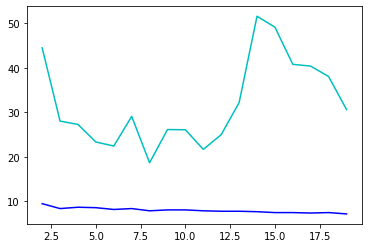

In [92]:
plt.plot(ns, gs, c='b')
plt.plot(ns, si, c='c')
plt.show()